In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Carga de datos

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets_mios/Sleep_health_and_lifestyle_dataset.csv")

In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.shape

(374, 13)

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
pd.unique(df['BMI Category'])

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

Hay muchos nulos en el historial de desordenes del sueño. Lo mejor sería eliminarlo y no tomar en cuenta esa columna para el modelo.

In [ ]:
df = df.drop(['Sleep Disorder','Person ID'], axis=1)

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000


Hay que separar la presión sanguinea en dos columnas y pasarlas a entero

In [ ]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

df = df.drop('Blood Pressure', axis=1)

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90


Necesitamos juntar el "Normal weight" y "Normal" en uno solo

In [ ]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [ ]:
pd.unique(df['BMI Category'])

array(['Overweight', 'Normal', 'Obese'], dtype=object)

#Analisis exploratorio

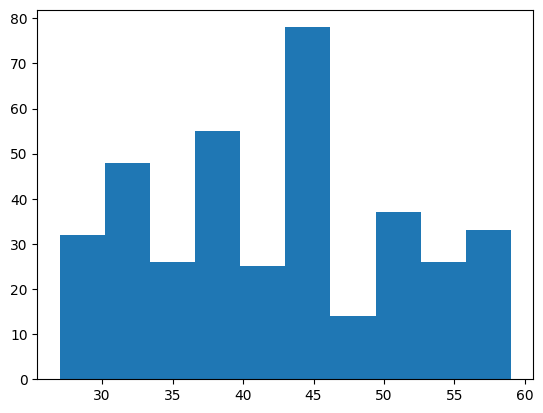

In [ ]:
plt.hist(df['Age'])
plt.show()

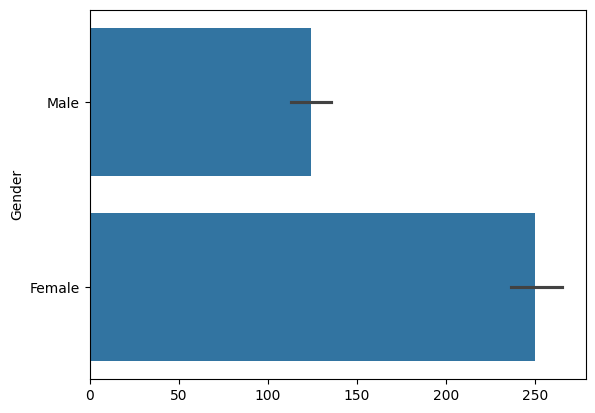

In [ ]:
sns.barplot(df['Gender'])
plt.show()

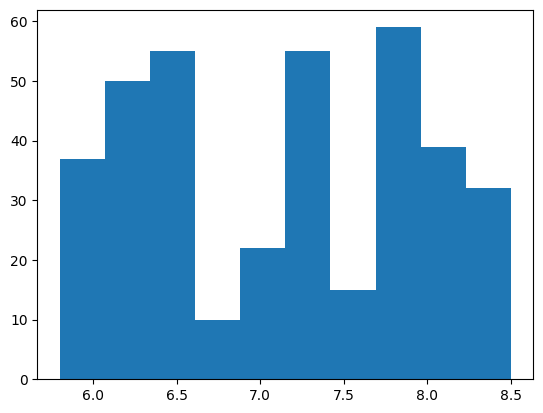

In [ ]:
plt.hist(df['Sleep Duration'])
plt.show()

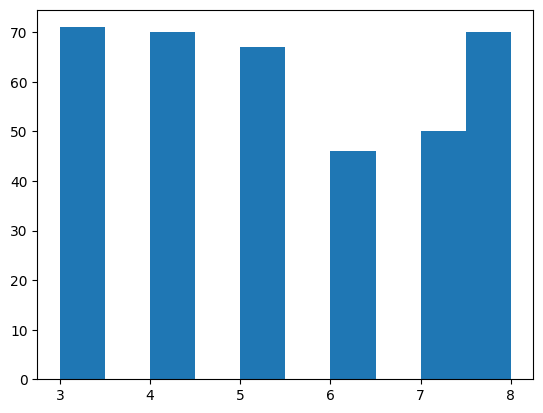

In [ ]:
plt.hist(df['Stress Level'])
plt.show()

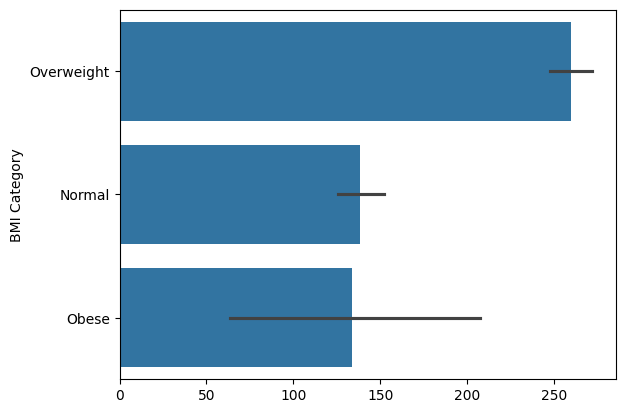

In [ ]:
sns.barplot(df['BMI Category'])
plt.show()

In [ ]:
df['Physical Activity Level'].max()

90

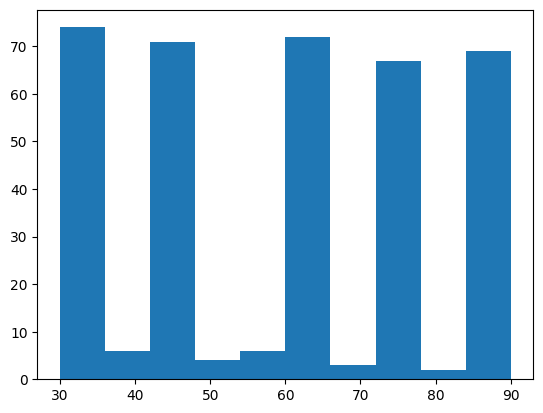

In [ ]:
plt.hist(df['Physical Activity Level'])
plt.show()

**Tratamiento de datos para elegir el mejor modelo**

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,140,90


In [ ]:
pd.unique(df['Occupation'])

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

**Cambiando de profesiones específicas a areas de trabajo**

In [ ]:
mapping = {
    'Software Engineer': 'Tecnología',
    'Engineer': 'Ingeniería',
    'Doctor': 'Salud',
    'Nurse': 'Salud',
    'Teacher': 'Educación',
    'Sales Representative': 'Ventas',
    'Salesperson': 'Ventas',
    'Manager': 'Gestión',
    'Accountant': 'Finanzas',
    'Scientist': 'Ciencia',
    'Lawyer': 'Leyes'
}

In [ ]:
# Reemplazar los valores en la columna
df['Occupation'] = df['Occupation'].replace(mapping)

In [ ]:
df['Occupation'] = df['Occupation'].replace('Gestión', 'RH')

In [ ]:
df['Occupation'].head()

,Occupation
0,Tecnología
1,Salud
2,Salud
3,Ventas
4,Ventas


Codificando Ocupaciones

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
df['Occupation_encoded'] = label_encoder.fit_transform(df['Occupation'])

In [ ]:
print("Clases y etiquetas:")
for cls, label in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{cls}: {label}")

Clases y etiquetas:
Ciencia: 0
Educación: 1
Finanzas: 2
Ingeniería: 3
Leyes: 4
RH: 5
Salud: 6
Tecnología: 7
Ventas: 8


Codificando BMI

In [ ]:
pd.unique(df['BMI Category'])

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [ ]:
# Diccionario de mapeo
category_mapping = {'Normal': 0, 'Overweight': 1, 'Obese': 2}

# Asignar valores usando map
df['BMI_category_encoded'] = df['BMI Category'].map(category_mapping)

Codificando Genero

In [ ]:
pd.unique(df['Gender'])

array(['Male', 'Female'], dtype=object)

In [ ]:
# Diccionario de mapeo
gender_mapping = {'Male': 0, 'Female': 1}

# Asignar valores usando map
df['Gender_encoded'] = df['Gender'].map(gender_mapping)

**Codificación de columnas categóricas:**

**Ocupaciones:**
* Ciencia: 0
* Educación: 1
* Finanzas: 2
* RH: 3
* Ingeniería: 4
* Leyes: 5
* Salud: 6
* Tecnología: 7
* Ventas: 8

**BMI:**
* Normal: 0
* Overweight: 1
* Obese: 2

**Gender:**
* Male: 0
* Female: 1

In [ ]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,Diastolic,Occupation_encoded,BMI_category_encoded,Gender_encoded
0,Male,27,Tecnología,6.1,6,42,6,Overweight,77,4200,126,83,7,1,0
1,Male,28,Salud,6.2,6,60,8,Normal,75,10000,125,80,6,0,0
2,Male,28,Salud,6.2,6,60,8,Normal,75,10000,125,80,6,0,0
3,Male,28,Ventas,5.9,4,30,8,Obese,85,3000,140,90,8,2,0
4,Male,28,Ventas,5.9,4,30,8,Obese,85,3000,140,90,8,2,0


Eliminar columnas categóricas para solo dejar numéricas

In [ ]:
df_numeric = df.drop(columns=['Gender', 'Occupation', 'BMI Category'])
df_numeric.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Occupation_encoded,BMI_category_encoded,Gender_encoded
0,27,6.1,6,42,6,77,4200,126,83,7,1,0
1,28,6.2,6,60,8,75,10000,125,80,6,0,0
2,28,6.2,6,60,8,75,10000,125,80,6,0,0
3,28,5.9,4,30,8,85,3000,140,90,8,2,0
4,28,5.9,4,30,8,85,3000,140,90,8,2,0


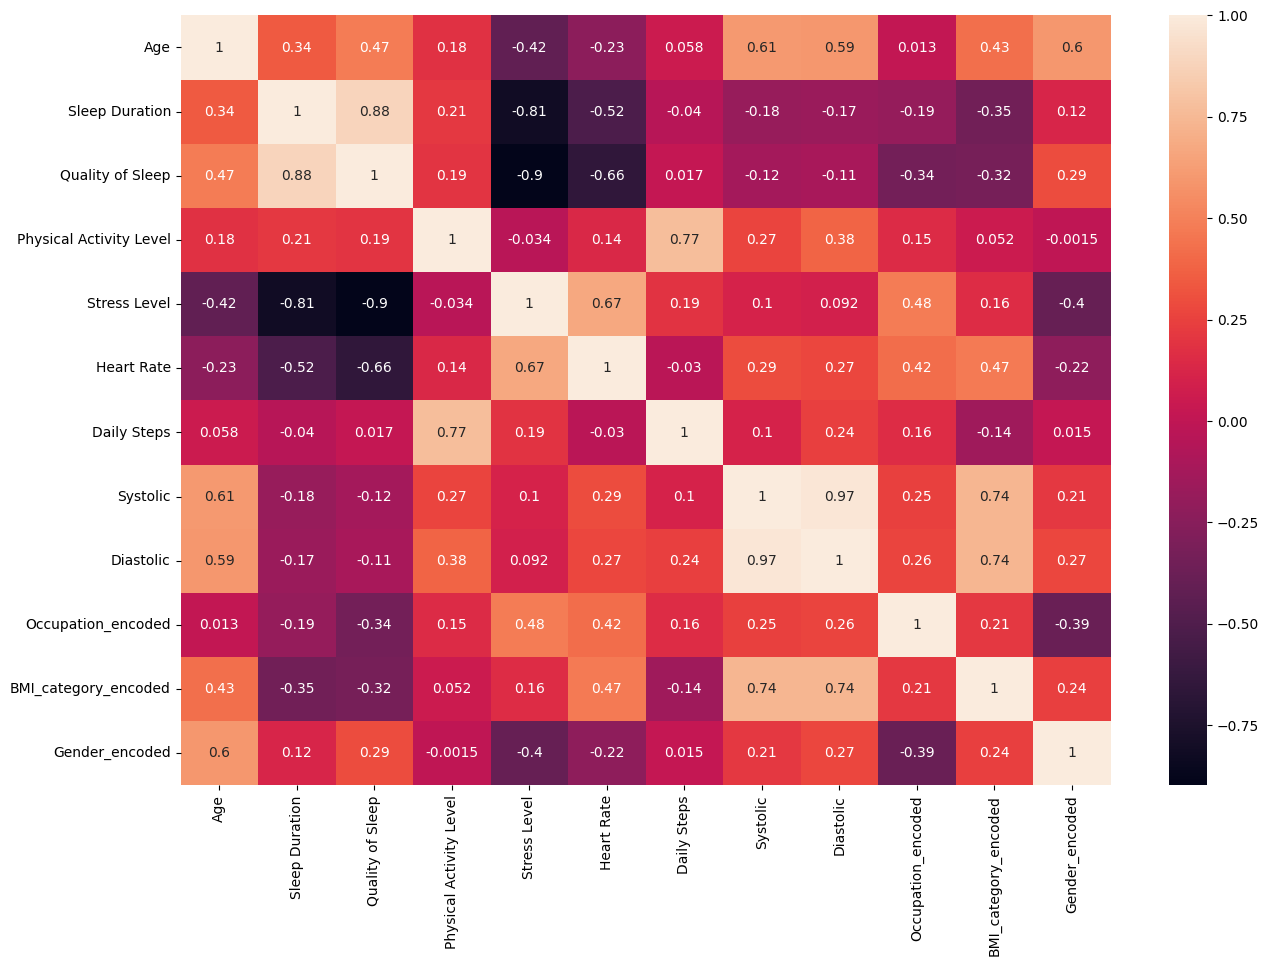

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()

##Modelo de Machine Learning

Al no haber correlación visual directa, pero de forma numérica se observa que las variables si afectan a nuestra variable objetivo (nivel de estrés) es prudente usar Arboles de decisión.

No se usa randoom forest porque al ser muy pocos datos podemos causar overfitting.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
df_numeric.head(2)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Occupation_encoded,BMI_category_encoded,Gender_encoded
0,27,6.1,6,42,6,77,4200,126,83,7,1,0
1,28,6.2,6,60,8,75,10000,125,80,6,0,0


**Modificacion: Eliminar columnas variables que no sean accesibles para el usuario en el momento**

In [ ]:
df_numeric.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic',
       'Occupation_encoded', 'BMI_category_encoded', 'Gender_encoded'],
      dtype='object')

In [ ]:
not_accessible = ['Quality of Sleep', 'Physical Activity Level', 'Systolic', 'Diastolic']
df_numeric = df_numeric.drop(not_accessible, axis=1)

In [ ]:
df_numeric.head(2)

,Age,Sleep Duration,Stress Level,Heart Rate,Daily Steps,Occupation_encoded,BMI_category_encoded,Gender_encoded
0,27,6.1,6,77,4200,7,1,0
1,28,6.2,8,75,10000,6,0,0


In [ ]:
# Separar características y variable objetivo
X = df_numeric.drop('Stress Level', axis=1)
y = df_numeric['Stress Level']

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
#Crear el modelo de Decision Tree con poda
dt_classifier = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
dt_classifier.fit(X_train, y_train)

# Hacer predicciones y evaluar
y_pred = dt_classifier.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       0.89      1.00      0.94         8
           5       1.00      0.82      0.90        11
           6       0.90      1.00      0.95         9
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00        12

    accuracy                           0.96        57
   macro avg       0.96      0.97      0.96        57
weighted avg       0.97      0.96      0.96        57



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test, y_pred)

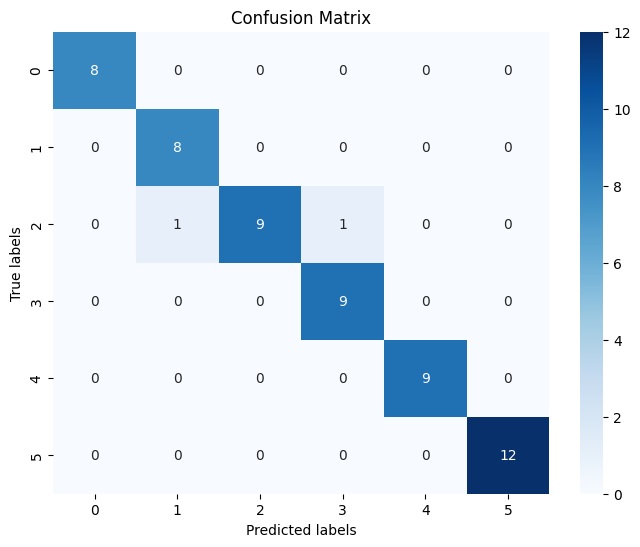

In [ ]:
# Crear el plot de la matriz de confusión
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()

In [ ]:
df_numeric.columns

Index(['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
       'Stress Level', 'Heart Rate', 'Daily Steps', 'Systolic', 'Diastolic',
       'Occupation_encoded', 'BMI_category_encoded', 'Gender_encoded'],
      dtype='object')

In [ ]:
df_numeric['Stress Level'].unique()

array([6, 8, 7, 4, 3, 5])

##Probando el modelo con persona ficticia

In [ ]:
# Crear un DataFrame con los datos de la nueva persona
new_person = pd.DataFrame({
    'Age': [20],
    'Sleep Duration': [6.7],
    'Heart Rate': [70],
    'Daily Steps': [1000],
    'Occupation_encoded': [7],  # Tech
    'BMI_category_encoded': [0],  # Normal
    'Gender_encoded': [0]  # Male
})

# Hacer la predicción con el modelo entrenado
predicted_stress_level = dt_classifier.predict(new_person)

# Imprimir el resultado
print("Predicted Stress Level:", predicted_stress_level[0])


Predicted Stress Level: 5


Conclusiones:
* Las variables de peso para el nivel de estrés en el arbol de decisión son sin duda el latido del corazón, los pasos diarios y sobre todo la duración del sueño. Estoy casi seguro que esas hacen un 80% del trabajo

In [ ]:
import joblib

save_path = '/content/drive/MyDrive/Modelos ML/stress_predict.pkl'

# Guardar el modelo
joblib.dump(dt_classifier, save_path)
print(f"Modelo guardado en: {save_path}")

Modelo guardado en: /content/drive/MyDrive/Modelos ML/stress_predict.pkl


In [ ]:
def pow_bool(n):
  aux = 1
  potence = 1
  while potence < n:
    potence = 2**aux
    if n == potence:
      return True
    aux += 1
  return False

In [ ]:
def pow_bool_rec(n, aux=1, potence=1):
  if potence > n:
    return False
  if n == potence:
    return True
  potence = 2**aux
  return pow_bool_rec(n, aux+1, potence)



In [ ]:
print(pow_bool_rec(16))

True
